In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 3.3+ MB


In [5]:
# Drop ctz (citizen of another country) column where most data is missing
df = df.drop(columns='ctz')

df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [6]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [7]:
df.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

From my exploration so far, I know that I need to convert some of these object columns that are actually just numbers to numeric values. Specifically, it looks like it is all of the time splits: 5k, 10k, 20k, half, 25k, 30k, 35k, and 40k.

In [8]:
# I will also need to removve the "-" values

for col in df[['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k']]:
    df[col] = df[col].apply(str.strip).replace("-", np.nan)
    df[col] = pd.to_numeric(df[col])

In [9]:
# Recheck our dtypes and value counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 20 columns):
10k          31934 non-null float64
name         31984 non-null object
division     31984 non-null int64
25k          31768 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
35k          31950 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null float64
5k           31932 non-null float64
half         31912 non-null float64
20k          31933 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float64
dtypes: float64(10), int64(4), object(6)
memory usage: 4.1+ MB


The columns that were transformed to numeric values now have missinginess that needs to be dealt with. I will perform interpolation to fill these values based on similar rows.

In [10]:
for col in df[['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k']]:
    df[col] = df[col].interpolate(method='nearest')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 20 columns):
10k          31984 non-null float64
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
35k          31984 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null float64
5k           31984 non-null float64
half         31984 non-null float64
20k          31984 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null float64
dtypes: float64(10), int64(4), object(6)
memory usage: 4.1+ MB


In [12]:
# Drop Names and Bib ID, as that is not helpful information for our clustering algorithms

df = df.drop(columns=['name', 'bib'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k          31984 non-null float64
division     31984 non-null int64
25k          31984 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null float64
5k           31984 non-null float64
half         31984 non-null float64
20k          31984 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null float64
dtypes: float64(10), int64(4), object(4)
memory usage: 3.9+ MB


I now only have four object variables left to decide what to do with:
- Gender
    - I will binarize to 0 and 1 values
- State
    - With 68 unique values, it may be worthwhile to get dummy variables
- Country
    - With 78 unique values, dummy variables may be helpful as well
- City
    - With over 5000 different cities, this is probably something to just drop

In [14]:
df = df.drop(columns='city')

In [15]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.00000,31984.000000,31984.000000,31984.000000
mean,51.807459,1932.563032,133.770639,42.407079,242.997314,8051.044741,196.870877,15939.587825,9.275658,164.604685,25.75988,111.685348,105.735206,229.056082
std,8.966352,1715.228694,25.654234,11.316496,52.300431,4754.005626,41.977685,9232.978224,1.992486,33.970734,4.32939,21.059566,19.786613,49.188769
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.75000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.550000,33.000000,205.527500,3972.000000,167.130000,7943.750000,7.850000,140.670000,22.65000,96.850000,91.770000,193.830000
50%,50.350000,1425.000000,129.030000,42.000000,232.370000,7970.000000,188.180000,15939.500000,8.870000,157.770000,25.10000,107.870000,102.180000,218.880000
75%,57.172500,2611.000000,148.072500,50.000000,273.235000,11968.000000,220.180000,23935.250000,10.430000,182.972500,28.48000,123.080000,116.550000,257.530000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.95000,236.670000,224.350000,508.350000


Before transforming Gender, State, and Country numerically, lets do some visualizations using these.

In [16]:
df['gender'].value_counts()

M    17617
F    14367
Name: gender, dtype: int64

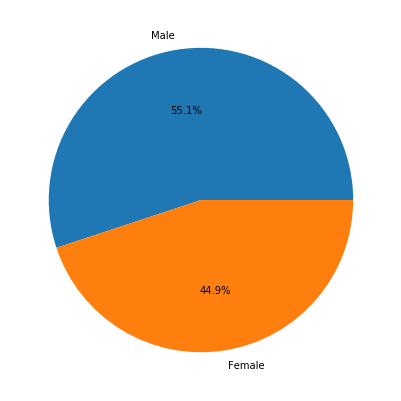

In [17]:
plt.figure(figsize=(7,7))
plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.show()

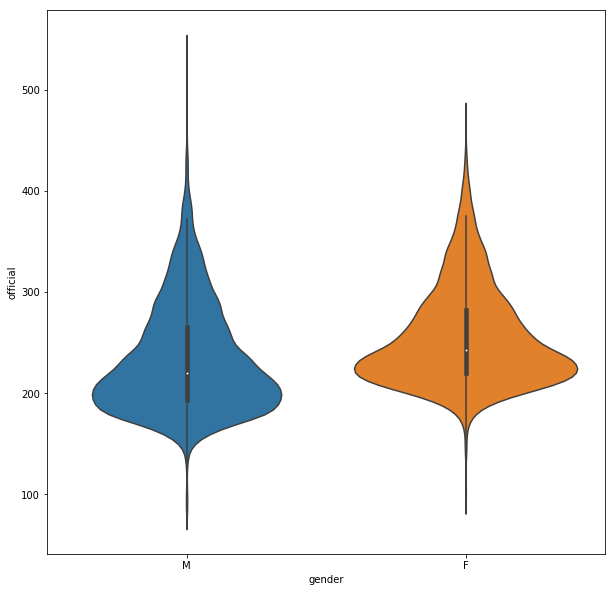

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(x='gender', y='official', data=df)

In [19]:
df['country'].value_counts()

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       89
BRA       87
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
CHI       29
ISL       28
FIN       28
BEL       27
SIN       23
AUT       22
NOR       21
RSA       19
VEN       19
RUS       18
       ...  
PHI        4
MAS        4
TUR        4
SVK        4
ECU        3
DOM        3
HUN        3
UKR        3
PAN        3
BAH        2
THA        2
ESA        2
QAT        2
EGY        2
ROU        2
BRN        1
CAY        1
LIE        1
BAR        1
INA        1
VGB        1
TAN        1
EST        1
URU        1
BLR        1
TRI        1
CRO        1
MAR        1
ZIM        1
BOL        1
Name: country, Length: 78, dtype: int64

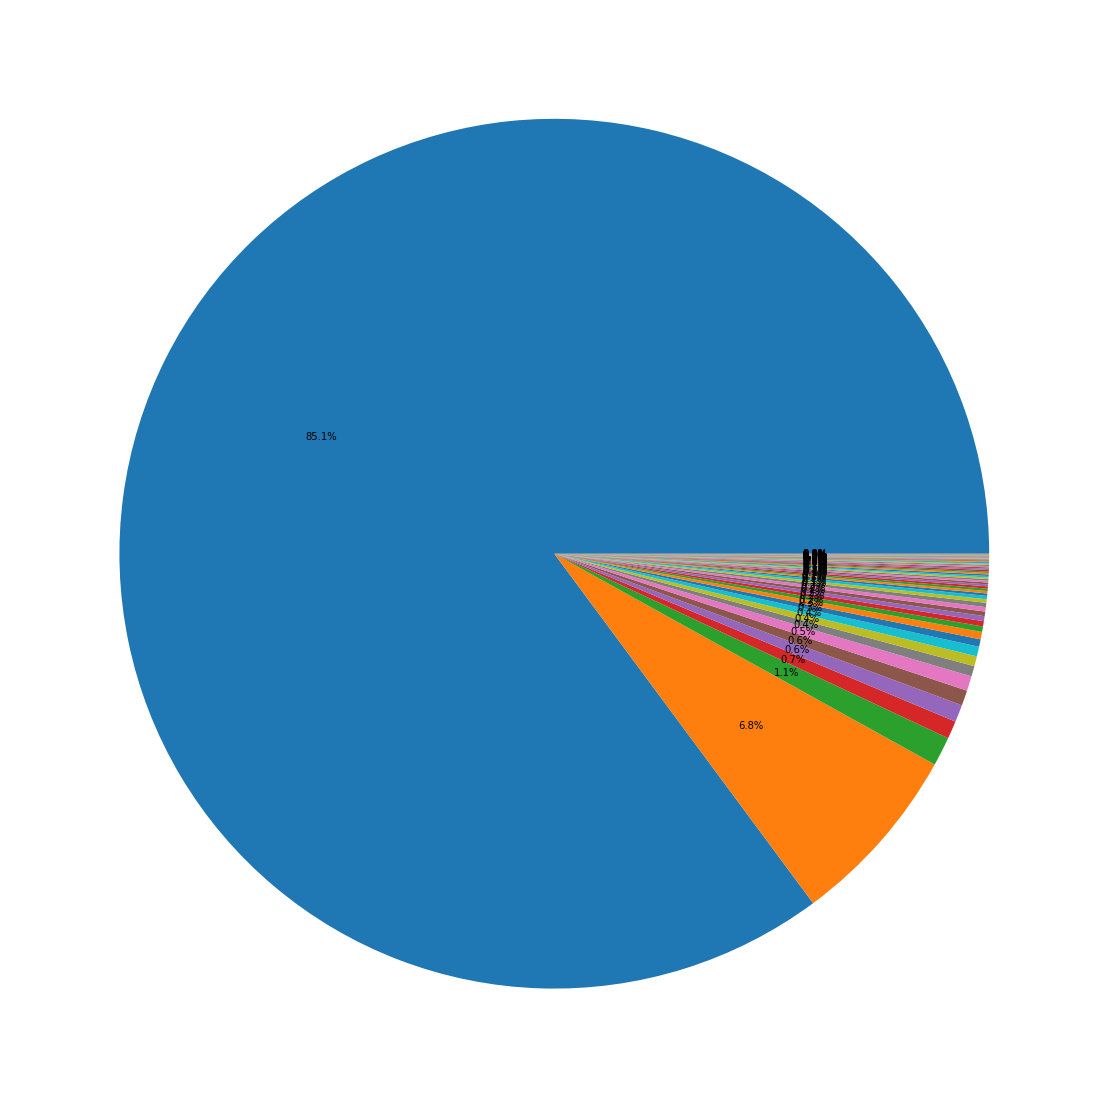

In [20]:
plt.figure(figsize=(20,20))
plt.pie(df['country'].value_counts(), autopct='%1.1f%%')
plt.show()

We can see here that the vast majority, over 85%, of participants are from the United States. The next largest group is from Canada at about 7%, Great Britain comes in at third with only 1.1%, and then every other nation has 0.7% or less.

In [21]:
df['state'].value_counts()

MA    7587
CA    2326
NY    1553
ON    1052
PA    1001
TX     992
IL     916
OH     760
FL     750
VA     713
MI     695
NC     618
WA     596
CO     578
NJ     569
MN     556
MD     527
NH     526
CT     521
GA     443
WI     433
UT     431
QC     419
OR     406
AZ     318
IN     291
TN     261
MO     256
ME     250
RI     233
      ... 
ID     124
NE     111
NS     109
AL     105
OK      92
NV      88
LA      78
NM      71
MT      65
DE      63
WV      56
NB      55
AK      50
HI      49
AR      48
MB      47
MS      46
SD      32
SK      32
ND      31
PE      23
WY      22
NL      18
PR      17
AE       7
YT       5
NT       3
GU       1
AP       1
AA       1
Name: state, Length: 68, dtype: int64

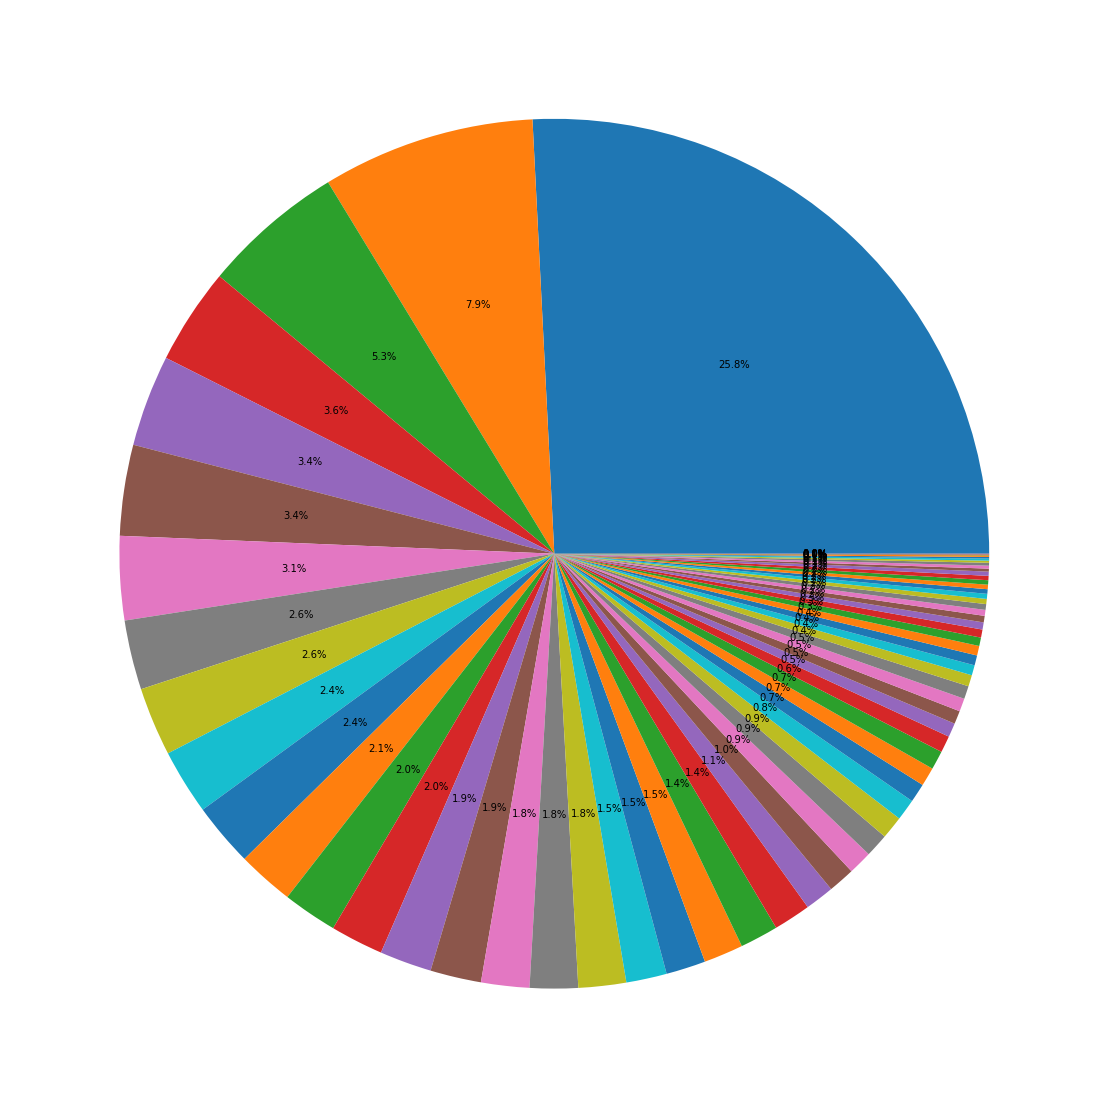

In [22]:
plt.figure(figsize=(20,20))
plt.pie(df['state'].value_counts(), autopct='%1.1f%%')
plt.show()

Massechusetts is the state with the most participants with 25.8%, California has 7.9%, New York has 5.3%, and then all other states have 3.6% or less, with many states at much less than 1% in that group.

I am going to now make dummies in one df and just remove them in another df. I will create clusters for both versions of the data and check for validations on both as well.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 17 columns):
10k          31984 non-null float64
division     31984 non-null int64
25k          31984 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null float64
5k           31984 non-null float64
half         31984 non-null float64
20k          31984 non-null float64
country      31984 non-null object
40k          31984 non-null float64
dtypes: float64(10), int64(4), object(3)
memory usage: 3.8+ MB


In [24]:
df['gender'] = np.where(df['gender'] == 'F', 0, 1)

In [25]:
from sklearn.preprocessing import normalize

# Create dataframe of columns that need to be normalized
df_norm = df[['10k', 'division', '25k', 'age', 'official', 'genderdiv', '35k',
             'overall', 'pace', '30k', '5k', 'half', '20k', '40k']]

# Normalize columns
names = df_norm.columns
df_norm = pd.DataFrame(normalize(df_norm), columns=names)

# Reinsert  binarized gender
df_norm['gender'] = df['gender']

# get dummies
df_dummies = pd.concat([df_norm,
                        pd.get_dummies(df['state']),
                        pd.get_dummies(df['country'])],
                       axis=1)

In [26]:
df_norm.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,0.005932,0.128473,0.015096,0.005302,0.026687,0.452796,0.021784,0.848235,0.001019,0.018376,0.002957,0.012666,0.012003,0.025184,0.550807
std,0.011472,0.114398,0.029181,0.012188,0.050600,0.144291,0.041691,0.110248,0.001933,0.035356,0.005692,0.024545,0.023273,0.047797,0.497420
min,0.001154,0.000030,0.002238,0.000489,0.009460,0.003558,0.005519,0.003854,0.000361,0.003630,0.000540,0.002496,0.002364,0.005483,0.000000
25%,0.002167,0.048851,0.005669,0.001658,0.010360,0.366558,0.008396,0.795971,0.000395,0.007004,0.001073,0.004709,0.004456,0.009772,0.000000
50%,0.002822,0.086995,0.007209,0.002517,0.012936,0.485174,0.010484,0.868667,0.000494,0.008799,0.001410,0.006029,0.005710,0.012193,1.000000
75%,0.004888,0.188279,0.012359,0.004334,0.021789,0.573449,0.017744,0.922069,0.000832,0.014994,0.002443,0.010387,0.009839,0.020547,1.000000
max,0.117890,0.476894,0.296293,0.273505,0.528807,0.683064,0.423975,0.992400,0.020217,0.356152,0.058907,0.249715,0.237242,0.496063,1.000000


In [27]:
df_dummies.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,...,TPE,TRI,TUR,UAE,UKR,URU,USA,VEN,VGB,ZIM
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,...,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,0.005932,0.128473,0.015096,0.005302,0.026687,0.452796,0.021784,0.848235,0.001019,0.018376,...,0.000563,0.000031,0.000125,0.000532,0.000094,0.000031,0.851457,0.000594,0.000031,0.000031
std,0.011472,0.114398,0.029181,0.012188,0.050600,0.144291,0.041691,0.110248,0.001933,0.035356,...,0.023717,0.005592,0.011183,0.023049,0.009685,0.005592,0.355643,0.024366,0.005592,0.005592
min,0.001154,0.000030,0.002238,0.000489,0.009460,0.003558,0.005519,0.003854,0.000361,0.003630,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002167,0.048851,0.005669,0.001658,0.010360,0.366558,0.008396,0.795971,0.000395,0.007004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.002822,0.086995,0.007209,0.002517,0.012936,0.485174,0.010484,0.868667,0.000494,0.008799,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.004888,0.188279,0.012359,0.004334,0.021789,0.573449,0.017744,0.922069,0.000832,0.014994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.117890,0.476894,0.296293,0.273505,0.528807,0.683064,0.423975,0.992400,0.020217,0.356152,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So here I have my two dataframes: 
- one with normalized values for times, age, and divisions with the gender binarized varaible added
- one with all that as well as 146 dummy columns for the state and country variables

# Data Version 1 Cluster Testing
I will now begin my clustering analysis with the smaller dataframe and the k-means clustering algorithm. I will have the algorithm create 2 cluster, 3 cluster, 4 cluster, 5 cluster, and 6 cluster solutions and compare each solution across 4 equal samples of the data for consistency. I will then run similarity silhouette numbers for each of the solutions as well.

In [28]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Make a pca version of the data to have two-dimensional data that can be visualized
pca = PCA(n_components=2)

df_norm_pca = pca.fit_transform(df_norm)

# Make four equal samples of the data by halving first, then halving each again
df_half1, df_half2, df_pcahalf1, df_pcahalf2 = train_test_split(
    df_norm,
    df_norm_pca,
    test_size=0.5,
    random_state=42)

df1, df2, df_pca1, df_pca2 = train_test_split(
    df_half1,
    df_pcahalf1,
    test_size=0.5,
    random_state=42)

df3, df4, df_pca3, df_pca4 = train_test_split(
    df_half2,
    df_pcahalf2,
    test_size=0.5,
    random_state=42)

# Empty dataframe to store predictions and pca features for visualizations
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the whole data samples to be used by k-means,
# and the PCA-derived features samples for graphing. We use k-means to fit a
# model to the whole data samples, then store the predicted values and the
# two-feature PCA sample in the empty data frame.
for counter, data in enumerate([
    (df1, df_pca1),
    (df2, df_pca2),
    (df3, df_pca3),
    (df4, df_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions using whole data samples and store them for clusters 2 to 6.
    for nclust in range(2, 7):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred[str(nclust) + 'clusters' + '_sample' + str(counter)] = pred

In [29]:
ypred.head()

,pca_f1_sample0,pca_f2_sample0,2clusters_sample0,3clusters_sample0,4clusters_sample0,5clusters_sample0,6clusters_sample0,pca_f1_sample1,pca_f2_sample1,2clusters_sample1,...,4clusters_sample2,5clusters_sample2,6clusters_sample2,pca_f1_sample3,pca_f2_sample3,2clusters_sample3,3clusters_sample3,4clusters_sample3,5clusters_sample3,6clusters_sample3
0,0.582821,-0.038942,1,1,1,3,1,0.592743,-0.071464,0,...,3,0,0,-0.435981,-0.113740,0,1,0,3,3
1,-0.484492,-0.040836,0,0,0,2,0,-0.461234,-0.089080,1,...,2,3,4,0.581056,-0.061208,1,0,1,1,2
2,-0.464102,-0.112148,0,0,0,2,0,-0.435743,-0.059924,1,...,1,2,5,-0.502470,0.006925,0,1,0,3,5
3,0.560785,0.061708,1,1,1,3,1,-0.519896,0.448938,1,...,2,1,1,-0.495152,-0.054855,0,1,0,3,5
4,-0.430994,-0.115905,0,0,0,2,4,-0.500334,-0.023923,1,...,2,1,1,-0.451363,-0.089229,0,1,0,3,3


Now it is time to create the plots.

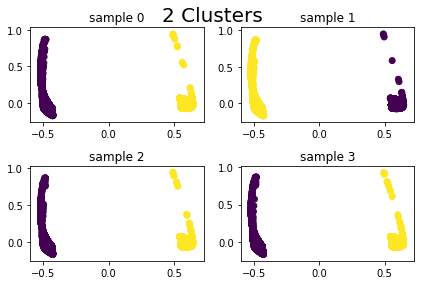

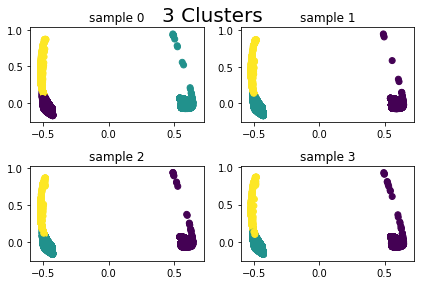

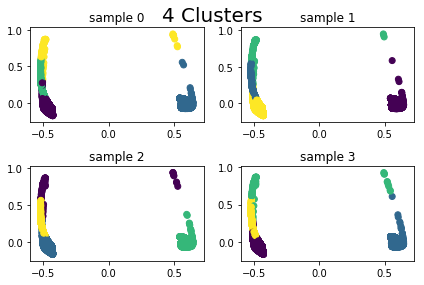

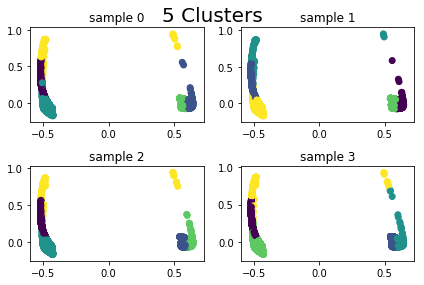

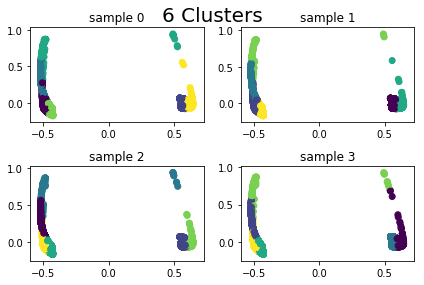

In [30]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 7):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_pca = ypred['pca_f1_sample{}'.format(i)]
        y_pca = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['{}clusters_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_pca, y_pca, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

It looks so far to me that 2 clusters and 3 clusters are the most compelling solutions. Let's run the similarity silhouette metric scores for each amount of clusters to see which has the highest and most consistent scores.

In [31]:
from sklearn.metrics import silhouette_score

print('K-Means w/ 2 clusters Silhouette Scores:') 
for sample in [df1, df2, df3, df4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

K-Means w/ 2 clusters Silhouette Scores:
0.8169457669425707
0.8160191841359287
0.8164079538011837
0.8174033762889783


In [32]:
print('K-Means w/ 3 clusters Silhouette Scores:') 
for sample in [df1, df2, df3, df4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

K-Means w/ 3 clusters Silhouette Scores:
0.7403451813489933
0.7407826534350245
0.7408490117572119
0.7404924807719457


In [33]:
print('K-Means w/ 4 clusters Silhouette Scores:') 
for sample in [df1, df2, df3, df4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

K-Means w/ 4 clusters Silhouette Scores:
0.7389400065837098
0.7389032387995907
0.738118077086895
0.735568834738381


In [34]:
print('K-Means w/ 5 clusters Silhouette Scores:') 
for sample in [df1, df2, df3, df4]:
    model = KMeans(n_clusters=5, random_state=42).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

K-Means w/ 5 clusters Silhouette Scores:
0.5726279316545803
0.5765459422557556
0.5656825830089827
0.5644619228176122


In [35]:
print('K-Means w/ 6 clusters Silhouette Scores:') 
for sample in [df1, df2, df3, df4]:
    model = KMeans(n_clusters=6, random_state=42).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

K-Means w/ 6 clusters Silhouette Scores:
0.5096677992587032
0.5096334601282677
0.504090029709879
0.5038704546711829


As expected, 2 and 3 clusters performed the best. 2 clusters in particular performed highest, with 4 clusters being much closer to 3 clusters in scores than I thought. 5 and 6 clusters were considerably weaker.

I am going to perform the same comparisons for using the Mean Shift algorithm to see if I can get any better results than simple K-Means.

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# A similar process as before
ypred = pd.DataFrame()

for counter, data in enumerate([
    (df1, df_pca1),
    (df2, df_pca2),
    (df3, df_pca3),
    (df4, df_pca4)]):
    
    ypred['pca_f1_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2_sample' + str(counter)] = data[1][:, 1]
    
    # Now with Mean Shift
    bandwidth = estimate_bandwidth(data[0], quantile=0.2, n_samples=1000)
    pred = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(data[0])
    ypred['Mean_Shift_Clusters_sample' + str(counter)] = pred

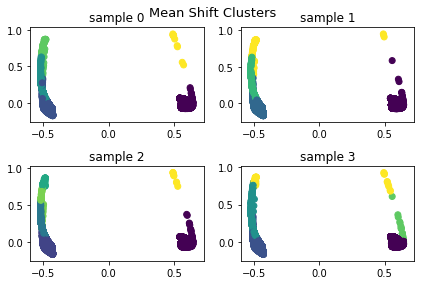

In [37]:
# Make a grid of subplots.
f, axarr = plt.subplots(2, 2)
    
# Make a plot for each sample.
for i in range(4):
        
    # PCA-created features.
    x_pca = ypred['pca_f1_sample{}'.format(i)]
    y_pca = ypred['pca_f2_sample{}'.format(i)]
        
    # Cluster assignments.
    c = ypred['Mean_Shift_Clusters_sample{}'.format(i)]
        
    # Assign the subplot to its place on the grid.
    rows = int(np.floor(i / 2))
    cols = i % 2
    axarr[rows, cols].scatter(x_pca, y_pca, c=c)
    axarr[rows, cols].set_title('sample {}'.format(i))
        
    
# Space out the plots so that the headings don't overlap axis values.
plt.suptitle('Mean Shift Clusters', fontsize=13)
plt.tight_layout()
plt.show()

There is incongruity between the samples using Mean Shift in how many clusters to use and which data to put in each cluster. I am inclined to not accept Mean Shift as the best algorithm for this data. I will compute the Silhouette Scores for the Mean Shift algorithm now.

In [38]:
print('Mean Shift Silhouette Scores:') 
for sample in [df1, df2, df3, df4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=1000)
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

Mean Shift Silhouette Scores:
0.7383685052389609
0.7372183870103659
0.7361882657148375
0.6320228602144033


As expected, these scores are not as high as the best-performing K-Means scores. There is also a major incongruity as the last score is much lower than the rest.

# Data Version 2 Cluster Testing

I will now perform the same tests on my second version of the data, the data with the dummy indicators for states and countries added.

In [39]:
df_dummies_pca = pca.fit_transform(df_dummies)

# Make four equal samples of the data by halving first, then halving each again
dfd_half1, dfd_half2, dfd_pcahalf1, dfd_pcahalf2 = train_test_split(
    df_dummies,
    df_dummies_pca,
    test_size=0.5,
    random_state=42)

dfd1, dfd2, dfd_pca1, dfd_pca2 = train_test_split(
    dfd_half1,
    dfd_pcahalf1,
    test_size=0.5,
    random_state=42)

dfd3, dfd4, dfd_pca3, dfd_pca4 = train_test_split(
    dfd_half2,
    dfd_pcahalf2,
    test_size=0.5,
    random_state=42)

ypred = pd.DataFrame()

for counter, data in enumerate([
    (dfd1, dfd_pca1),
    (dfd2, dfd_pca2),
    (dfd3, dfd_pca3),
    (dfd4, dfd_pca4)]):
    
    ypred['pca_f1_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2_sample' + str(counter)] = data[1][:, 1]
  
    for nclust in range(2, 7):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred[str(nclust) + 'clusters' + '_sample' + str(counter)] = pred

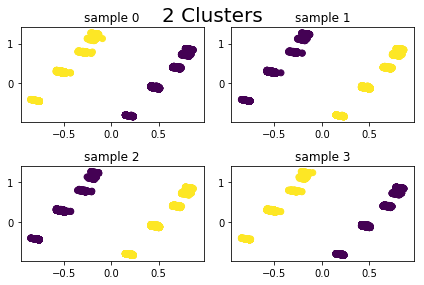

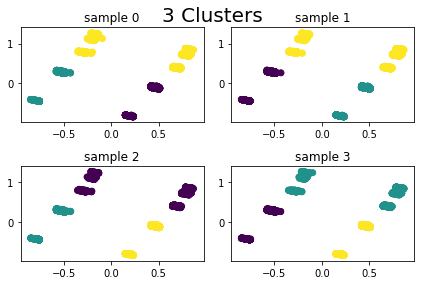

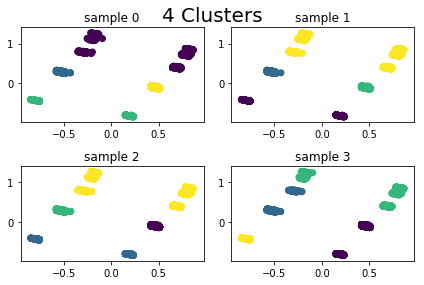

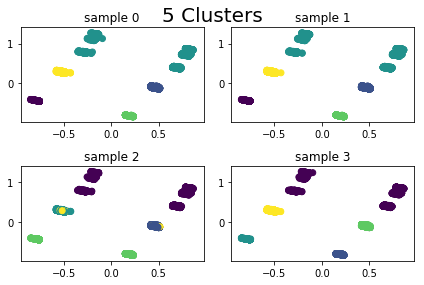

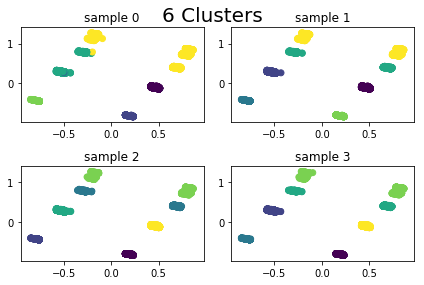

In [40]:
for cluster in range(2, 7):
    
    f, axarr = plt.subplots(2, 2)
    
    for i in range(4):
        
        x_pca = ypred['pca_f1_sample{}'.format(i)]
        y_pca = ypred['pca_f2_sample{}'.format(i)]
        
        c = ypred['{}clusters_sample{}'.format(cluster, i)]
        
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_pca, y_pca, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

It is intersting how different this data looks right off the bat. I will run the same Silhouette Scores as before.

In [41]:
print('K-Means w/ 2 clusters Silhouette Scores:') 
for sample in [dfd1, dfd2, dfd3, dfd4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_ 
    print(silhouette_score(sample, labels, metric='euclidean'))

K-Means w/ 2 clusters Silhouette Scores:
0.20235366339712027
0.20325792887312452
0.201558994952186
0.20181171940849962


It looks like, for the purposes of my clustering, the data without the country and state dummy variables performs better.

# Final Analysis

So now that I have determined that the best clustering algorithm is a K-Means algorithm with two clusters on my data sans country and state information, what exactly does that mean? What does having two clusters represent? I have a theory that these two clusters will align with gender.

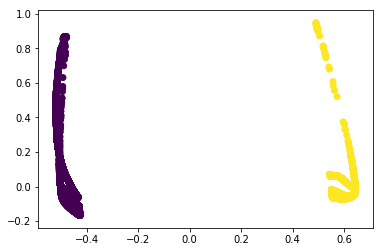

In [46]:
ypred = KMeans(n_clusters=2, random_state=42).fit_predict(df_norm)

plt.scatter(df_norm_pca[:,0], df_norm_pca[:,1], c=ypred)
plt.show()

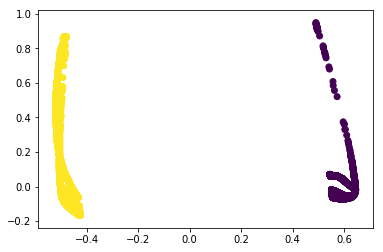

In [45]:
plt.scatter(df_norm_pca[:,0], df_norm_pca[:,1], c=df_norm['gender'])
plt.show()

As I predicted, the two clusters, visualized with their two-feature PCA reduced data, align exactly with the gender variable. 